In [2]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
len(train_images)

60000

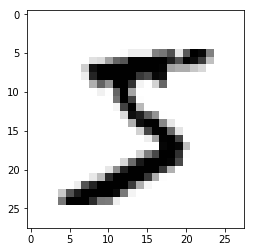

In [5]:
plt.imshow(train_images[0]/255, cmap=plt.cm.binary)

In [6]:
from keras import models
from keras import layers

In [7]:
network = models.Sequential()
network.add(layers.Dense(512, activation = 'relu', input_shape=(28*28,) ))
network.add(layers.Dense(10, activation = 'softmax'))

In [8]:
network.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [9]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255

In [10]:
from keras.utils import to_categorical

In [11]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [12]:
network.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.2655 - acc: 0.9228
Epoch 2/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.1044 - acc: 0.9697
Epoch 3/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.0685 - acc: 0.9798
Epoch 4/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.0498 - acc: 0.9852
Epoch 5/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.0380 - acc: 0.9884


In [13]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [14]:
test_loss, test_accuracy = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 35us/step


In [15]:
test_accuracy

0.978

10